<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

<CENTER><h1>Intro to histogramming</h1></CENTER>

In particle physics, we use so many events to make our measurements that looking at the events by hand would be very impractical- instead, we use computer code to do the looking for us.

This notebook will walk you through some basic computing techniques commonly used in high energy physics (HEP) analyses. You will learn how to:

1. Interact with ATLAS data files
2. Create a histogram for displaying data
3. Fill your histogram
4. Draw your histogram
5. Normalise your histogram
    
We will be showing you examples of these techniques to produce a plot with the __number of leptons__ in each event in a set of 13 TeV Z boson data. At the same time, you will be following along to produce your own plot with the __number of jets__ in each event in a set of 8 TeV W and Z boson data. TeV stands for 'Tera-electron-volt' and is a until of energy we use in particle physics - More on that in the next notebook!
    
<table><tr>

<td> <img src="./images/WBoson.png" style="height: 150px;"/> </td>
</tr></table>

---

## Step 0: What to load

The software we will use to analyse our ATLAS data is called __ROOT__. Using ROOT, we are able to process large datasets, do statistical analyses, and visualise our data using __histograms__. ROOT also has its own format for __storing__ data - we'll come back to this later.

In [3]:
#Import the ROOT library
import ROOT

#Here you could also import any other python libraries you would like to use

Welcome to JupyROOT 6.18/04


Before we can begin, we also need to know where to look for our ATLAS data! Instructions for doing so can be found <a href="FindingOpenData.pdf"> here</a>.

---

## Step 1: Working with .root files

Next we have to open the data files that we want to analyze. 

As mentioned above, ROOT has it's own format for storing physics data - a _[something].root_ file. For each event in the dataset we could have many particles, and for each particle, there are several __variables__ we measure (e.g. energy, momentum, charge). The structure of a _*.root_ file is as follows:


- A _.root_ file stores and keeps track of all this information in a container called a __TTree__. 
- Inside the TTree, each variable that we measure are stored separately in containers called __branches__. 
- Inside each branch, the measurement of that variable for each event is stored.

<CENTER><img src="./images/root_struct.png" style="width:70%"></CENTER>

Lets load our _*.root_ file using ROOT's `TFile.Open()` function. The __argument__ inside the brackets tells ROOT where to look for the file.

In [4]:
f = ROOT.TFile.Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root") ## 13 TeV sample
#f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root") ## 8 TeV sample

_You could uncomment one of the other lines to repeat the analysis we will do below for a different dataset (remember to comment out the top line first)._

Next, to load our data from the _*.root_ file, we retrieve the TTree  using the `.Get()` function, which takes the name of the TTree as its argument.

In [5]:
#In this .root file, the TTree is called "mini"
tree = f.Get("mini")

The `.GetListOfBranches()` function will extract the set of branches from the tree. Looping through each branch in this set, the `.GetName()` function can be used to acess the branch names.

In [6]:
branches = tree.GetListOfBranches()

print('TTree branch names:')
print('-------------------')
for branch in branches:
    print(branch.GetName())

TTree branch names:
-------------------
runNumber
eventNumber
channelNumber
mcWeight
scaleFactor_PILEUP
scaleFactor_ELE
scaleFactor_MUON
scaleFactor_PHOTON
scaleFactor_TAU
scaleFactor_BTAG
scaleFactor_LepTRIGGER
scaleFactor_PhotonTRIGGER
trigE
trigM
trigP
lep_n
lep_truthMatched
lep_trigMatched
lep_pt
lep_eta
lep_phi
lep_E
lep_z0
lep_charge
lep_type
lep_isTightID
lep_ptcone30
lep_etcone20
lep_trackd0pvunbiased
lep_tracksigd0pvunbiased
met_et
met_phi
jet_n
jet_pt
jet_eta
jet_phi
jet_E
jet_jvt
jet_trueflav
jet_truthMatched
jet_MV2c10
photon_n
photon_truthMatched
photon_trigMatched
photon_pt
photon_eta
photon_phi
photon_E
photon_isTightID
photon_ptcone30
photon_etcone20
photon_convType
tau_n
tau_pt
tau_eta
tau_phi
tau_E
tau_isTightID
tau_truthMatched
tau_trigMatched
tau_nTracks
tau_BDTid
ditau_m
lep_pt_syst
met_et_syst
jet_pt_syst
photon_pt_syst
tau_pt_syst
XSection
SumWeights
largeRjet_n
largeRjet_pt
largeRjet_eta
largeRjet_phi
largeRjet_E
largeRjet_m
largeRjet_truthMatched
largeRjet_D2
l

We can see how many events are stored in the tree using the `.GetEntries()` function. This is a useful check that the TTree has loaded correctly.

In [ ]:
print('Number of events in this tree: %d' %tree.GetEntries())

### Over to you

__1)__ __Replace the ###'s in the cell below__ to open the _*.root_ data file `"http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root"`

<details>
    <summary>Click here for hint 1: </summary>
    What function did we use above to open a root file?
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Use .TFile.Open()
</details>

In [ ]:
my_file = ###

__2)__ Load the tree named "mini" stored in the _.*root_ data file. Print the number of events in this tree.

<details>
    <summary>Click here for hint 1: </summary>
    Look above to see how we retrieved a TTree from the ROOT file
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Use the function .Get(). This function is applied to a file.
</details>

<details>
    <summary>Click here for hint 3: </summary>
    The GetEntries() function tells us how many events are in the tree. This function is applied to a TTree.
</details>

In [ ]:
my_tree = my_file.###
print('Number of events in this tree: %d' % ### )

__3)__ We will also need to create variables for the maximum number of jets and the minimum number of jets in a single event in this dataset for later, using the `GetMaximum(*args)` and `GetMinimum(*args)`, which take the branch name storing the number of jets per event (`'jet_n'`) as their argument.

<details>
    <summary>Click here for hint 1: </summary>
    GetMaximum(*args) and GetMinimum(*args) are applied to a TTree. 
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Replace '*args' in the instructions about with the name of the 'number of jets' branch, 'jet_n'
</details>

In [ ]:
minimum = int(my_tree.### )
maximum = int(my_tree.### )

#Print them out so we can see
print('Max no. jets: %d' %maximum)
print('Min no. jets: %d' %minimum)

---

## Step 2: Getting ready to display histograms

We're now almost ready to begin working with our data.

Similarly to a physical drawing, our histogram needs a structure to be drawn onto, so we create a __canvas__ to hold our histogram. If we do not have a canvas we will not be able to see our histogram at the end. 

We create our canvas using the `ROOT.TCanvas()` function. Its arguments are:

- Its name: `"Canvas"`
- Its title: `"a first way to plot a variable"`. 
- The two following arguments define the width and the height of the canvas (in pixels).

In [14]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

Now we define a histogram that will later be placed on this canvas using the `ROOT.TH1F()` function. 

Its name is `"variable"` and the title of the histogram is `"Example plot: Number of leptons"` with the the titles of the histogram's x and y axes (_Number of leptons_ and _Events_ respectively) appended to the plot title using semicolons. The three following arguments indicate that this histogram contains 5 __bins__ which have a range from 0 to 4.

In [15]:
hist = ROOT.TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",5,-0.5,4.5)

_(Note the offset of 0.5 in the range arguments. This shifts the bins so they are __centred__ on 0,1,2,3,4 rather than having their leftmost edges on those values, as is the default.)_

### Over to you

__4)__ Create a canvas to display your plot. Name your canvas `"8TeV_Canvas"`, give it the title `"plotting my variable"` and dimensions `700`x`500` pixels.

<details>
    <summary>Click here for hint 1: </summary>
    Use the ROOT.TCanvas() function. Keep the order of the arguments the same as the example above.
</details>

In [ ]:
my_canvas = ###

__5)__ Set up an (empty for now) histogram, which will contain the number of __jets__ in each event. Name your plot `"8TeV_variable"`, title it `"Example plot: Number of jets"` with axes `"Number of jets"` and `"Events"`. 

This time, instead of explicitly giving the bin range and number, do so in terms of the `maximum` and `minimum`. Remember how to centre the bins?

<details>
    <summary>Click here for hint 1: </summary>
    Use the ROOT.TH1F() function. Keep the order of the arguments the same as the example above.
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Offset the minimum and maximum bin edge by 0.5 to centre the bin.
</details>

In [ ]:
my_hist = ###

---

## Step 3: Filling histograms

It's now time to fill our histogram! In this example, we want to display the number of leptons in each event in our tree. This information is stored in a branch called `lep_n`.

To do this, we need to loop through all the events in the tree and fill the histogram `hist` that we already defined with the value stored in `lep_n` for each event. This is done with the `.Fill()` function which takes the branch name as its argument.

After the program has looped over all the data it prints the word __Done!__.

_In later examples, we'll be more picky about the events we put in our histogram, skipping some events in the tree if they don't meet certain criteria. This is called making __cuts__._

In [16]:
#Example of an event loop
for event in tree:
    hist.Fill(tree.lep_n)
    
print("Done!")

Done!


### Over to you

__6)__ Loop through each event in the tree, filling your histogram with the number of jets (contained in the branch `jet_n`) in each. When the loop is finished, print a message to indicate that it is done.

<details>
    <summary>Click here for hint 1: </summary>
        We want to perform this loop over every 'event' in our tree
</details>

<details>
    <summary>Click here for hint 2: </summary>
        Use the .Fill() function, which is applied to a histogram and takes the value of a particular TBranch for a particular event as an argument.
</details>

<details>
    <summary>Click here for hint 3: </summary>
        The value of a particular branch for a particlular event can be accessed using 'tree.{branch_name}'
</details>

In [ ]:
for event in my_tree:
    my_hist.###(my_tree.###)
    
### 

---

## Step 4: Drawing histograms

After filling the histogram, we want to see the results of the analysis. ROOT has a very specific order of operations for drawing histograms:

1. Declare any formatting you would like. In this example, we want to fill the histogram in a solid colour using the `.SetFillColor()` function. We set the edges to be the same colour by passing the same argument to `.SetEdgeColor()`.
2. Move ('change directory') to the canvas by calling `.cd()` 
3. Draw the histogram onto the canvas using the `.Draw()` function.
4. Draw the canvas on which the histogram is now "mounted". This is also done with the `.Draw()` function.

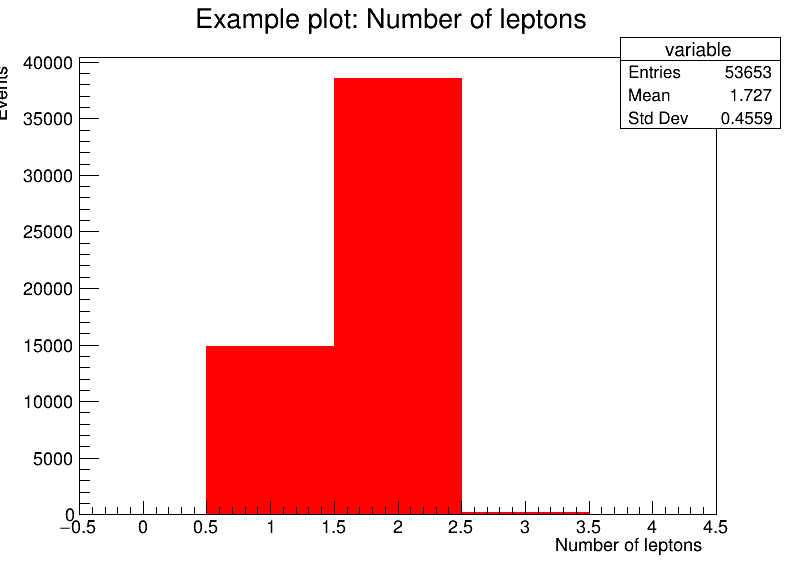

In [17]:
hist.SetFillColor(2) #.SetFillColor() takes whole numbers, which represent colours, as arguments
hist.SetLineColor(2) #Similarly, .SetLineColor() changes the histogram edge color 
#Try giving .SetFillColor() and .SetLineColor() different numbers as arguments

canvas.cd() #Move to the canvas
hist.Draw("h")
canvas.Draw("hist")

### Over to you

__7)__ Set up your histogram to be filled with a color other than red. Move to your canvas, draw your histogram onto the canvas, then draw your canvas. 

<details>
    <summary>Click here for hint 1: </summary>
        Use .SetFillColor() .cd() .Draw()
</details>

For more information on the ROOT colours, take a look at the ROOT documentation [here](https://root.cern.ch/doc/master/classTColor.html#C01).



In [ ]:
my_hist.###

my_canvas.###

my_hist.###
my_canvas.###

---

## Step 5: Normalising histograms

Often, we are more interested in the __proportions__ of our histogram than the absolute number of events it contains (which can change depending on what dataset you use).

Our final step will be to rescale the y-axis of our histogram to that the histogram's total is equal to 1. This is called __normalisation__.

In [ ]:
#Find the number of entries in the histogram
#In this particular case (where no cuts are made), this should be equal to the number of events in the tree

scale = hist.Integral() 
print('Number of entries in histogram: %0.1f' %scale)


#Divide the number of entries in each bin by the total number of entries in the histogram
#This will indicate what fraction of the total is held in each bin

hist.Scale(1/scale)

Finally, we format and draw the normalised histogram onto our canvas, then draw the canvas as we did above. 

In [ ]:
hist.SetFillColor(2)
hist.GetYaxis().SetTitle("Fraction of events") #Note the re-naming of the y-axis

canvas.cd()
hist.Draw("h")
canvas.Draw("hist")

### Over to you

__8)__ Normalize your histogram. Redraw it onto the canvas then redraw the canvas. 

<details>
    <summary>Click here for hint 1: </summary>
        Use .Integral() and .Scale() as shown above.
</details>

<details>
    <summary>Click here for hint 2: </summary>
        Use the functions from execise 7) for formatting the histograms.
</details>

In [ ]:
my_scale = my_hist.###

my_hist.Scale(###)

#Formatting options go here
#Rename the y-axis?
#Change the color?

my_canvas.cd()
my_hist.###
my_canvas.###

---

## Extension exercises

1) Remember how to extract the list of branches from a TTree? Choose a new branch from `my_tree` and repeat the steps __4-8__ above to show the distribution of that branch's variable over the dataset.

2) Are there any branches in the tree that you do not understand? List up to 3, then explore the
[ATLAS Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html)
- 
- 
- 
    
3) In the example above we plotted the number of leptons resulting from simulated ('Monte-Carlo'/'MC') collisions with one lepton and one jet at an energy of 13 TeV.

- You might have noticed the number of leptons plotted is not exactly 1 for each event. Why might that be?

<details>
    <summary>Click here for hint 1: </summary>
    What exact process is simulated in this file? Look at the last part of the file path, mc_361106.Zee.1largeRjet1lep.root
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Z-->ee is the process simulated here, but one of the electrons is being missed. What could have happened to it?
</details>

- Using the instructions for finding new datasets <a href="FindingOpenData.pdf"> here</a>, find a file with two 'final state' leptons and plot the number of leptons. How do the two plots compare?
    - Do you understand what all the file names mean? If not, ask a mentor!
    
4) So far, we have only plotted simulated data. 
- Using the instructions above, find the directory containing real collisions with 1 lepton and 1 jet in the final state.
- You might notice that the real data is split across several different files (e.g. data_A.1largeRjet1lep.root). Fill a histogram showing a branch of your choice with ALL the events in the full dataset

<details>
    <summary>Click here for hint 1: </summary>
    Load in each data file and its TTree under a separate name. 
</details>

<details>
    <summary>Click here for hint 2: </summary>
    Set up one histogram as usual
</details>

<details>
    <summary>Click here for hint 3: </summary>
    Add an extra layer to your histogram filling for loop, looping over the events in all of your trees 
</details>

5) So far we have only shown one histogram at a time. Draw two histograms on the same canvas to be compare them directly e.g. the `n_lepton` branch for the samples with both 1 and 2 final state leptons

<details>
    <summary>Click here for hint 1: </summary>
    Fill two histograms, but only set up 1 canvas.
</details>